# Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Задача — провести анализ и подготовить план действий по удержанию клиентов.

# Оглавление

1. [Шаг 1. Изучение общей информации](#step1)  
2. [Шаг 2. Подготовка данных](#step2)  
3. [Шаг 3. Анализ данных (EDA)](#step3)  
4. [Шаг 4. Построение модели прогнозирования оттока клиентов](#step4)  
5. [Шаг 5. Кластеризация клиентов](#step5)  
4. [Шаг 6. Выводы и базовые рекомендации по работе с клиентами](#step6)  

# Шаг 1. Изучение общей информации  <a id="step1"></a>

In [1]:
!pip install numpy==1.19.4
!pip install pandas==1.1.5
!pip install matplotlib==3.3.3
!pip install seaborn==0.11.0

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.5 MB 1.0 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.6 MB 4.9 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 283 kB 1.1 MB/s eta 0:00:01


In [2]:
# импорт библиотеки Pandas
import pandas as pd
# импорт библиотеки numpy
import numpy as np
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt
# импорт библиотеки seaborn
import seaborn as sns
# импорт библиотеки stats
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram, linkage
# импорт библиотеки warnings
import warnings
# игнорирование warnings
warnings.filterwarnings('ignore')
#  импорт библиотеки sklearn и разных методов
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.cluster import KMeans

In [4]:
# чтение файла rest_data с данными
data = pd.read_csv('/datasets/gym_churn.csv', sep = ',') 
# вывод таблицы с данными
data.sample(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3551,0,1,0,0,1,1,1,36,151.823233,1.0,2,1.385533,1.480464,0
2833,0,1,0,0,1,1,1,29,5.711843,1.0,2,0.667697,0.564066,0
2754,1,1,0,0,1,1,1,32,150.540366,1.0,1,3.007040,2.801864,0
3752,1,1,1,1,1,12,0,30,234.651342,10.0,4,2.733622,2.754167,0
2243,1,1,0,1,1,1,0,31,221.999504,1.0,4,1.798604,1.907377,0


In [5]:
# вывод информации о данных в столбцах
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [6]:
# вывод информации о столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

### Вывод 

В представленной таблице содержится 13 столбцов и 4000 строк:

| Название столбца | Значение | Тип данных | Комментарий |
|-|-|-|-|
| gender | пол | int64 | Столбец принимает значение 0 и 1, поменяем тип данных на bool |
| Near_Location | проживание или работа в районе, где находится фитнес-центр | int64 | Столбец принимает значение 0 и 1, поменяем тип данных на bool |
| Partner | сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента) | int64 | Столбец принимает значение 0 и 1, поменяем тип данных на bool |
| Promo_friends | факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента) | int64 | Столбец принимает значение 0 и 1, поменяем тип данных на bool |
| Phone | наличие контактного телефона | int64 | Столбец принимает значение 0 и 1, поменяем тип данных на bool |
| Contract_period | длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год) | int64 | Столбец принимает значения 1-12, поменяем тип данных на int8 |
| Group_visits | факт посещения групповых занятий | int64 | Столбец принимает значение 0 и 1, поменяем тип данных на bool |
| Age | возраст | int64 | Столбец принимает значения 18-41, поменяем тип данных на int8 |
| Avg_additional_charges_total |  суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салона | float64 | Максимальное значение 552.59, поменяем тип данных на float32 |
| Month_to_end_contract | срок до окончания текущего действующего абонемента (в месяцах) | float64 |  Столбец принимает значение 1 и 12, поменяем тип данных на int8 |
| Lifetime |  время с момента первого обращения в фитнес-центр (в месяцах) | int64 |  Столбец принимает значение 0 и 31, поменяем тип данных на int8 |
| Avg_class_frequency_total | суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон | float64 |  Поменяем тип данных на float16 |
| Avg_class_frequency_current_month |  средняя частота посещений в неделю за предыдущий месяц | float64 |  Поменяем тип данных на float16 |
| Churn | факт оттока в текущем месяце | int64 |  Поменяем тип данных на bool |

В таблице нет пропущенных значений.

Название столбцов понятны, но обозначены в разном регистре, для удобства работы приведем столбцы к нижнему регистру.

# Шаг 2. Подготовка данных  <a id="step2"></a>

Приведем названия столбцов к нижнему регистру.

In [7]:
# приведение к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Далее изменим тип столбцов там где это требовалось.

In [8]:
# функция изменения типа данных в столбцах
def change_type(columns, type):
    for col in columns:
        data[col] = data[col].astype(type)
        print('Привели столбец {} к типу {}'.format(col,type)) 
change_type(['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn'], 'bool')        

Привели столбец gender к типу bool
Привели столбец near_location к типу bool
Привели столбец partner к типу bool
Привели столбец promo_friends к типу bool
Привели столбец phone к типу bool
Привели столбец group_visits к типу bool
Привели столбец churn к типу bool


In [9]:
change_type(['contract_period', 'age', 'month_to_end_contract', 'lifetime'], 'int8')        

Привели столбец contract_period к типу int8
Привели столбец age к типу int8
Привели столбец month_to_end_contract к типу int8
Привели столбец lifetime к типу int8


In [10]:
change_type(['avg_additional_charges_total'], 'float32')

Привели столбец avg_additional_charges_total к типу float32


In [11]:
change_type(['avg_class_frequency_total','avg_class_frequency_current_month'], 'float16')        

Привели столбец avg_class_frequency_total к типу float16
Привели столбец avg_class_frequency_current_month к типу float16


In [12]:
# вывод таблицы с данными
data.sample(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
1465,False,False,False,False,True,1,True,30,191.028580,1,0,1.845703,1.752930,False
1341,False,True,True,False,True,1,False,24,56.129879,1,1,1.631836,1.368164,True
2727,True,True,False,True,True,6,False,35,254.190002,4,10,2.382812,2.345703,False
2279,True,True,False,False,True,1,True,32,240.527130,1,2,2.230469,2.267578,False
393,False,True,False,True,True,1,False,27,96.153824,1,2,1.148438,0.685547,True


In [13]:
# вывод информации о столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   bool   
 1   near_location                      4000 non-null   bool   
 2   partner                            4000 non-null   bool   
 3   promo_friends                      4000 non-null   bool   
 4   phone                              4000 non-null   bool   
 5   contract_period                    4000 non-null   int8   
 6   group_visits                       4000 non-null   bool   
 7   age                                4000 non-null   int8   
 8   avg_additional_charges_total       4000 non-null   float32
 9   month_to_end_contract              4000 non-null   int8   
 10  lifetime                           4000 non-null   int8   
 11  avg_class_frequency_total          4000 non-null   float

### Вывод

В ходе подготовки данных привели столбцы к нужному типу, переименовали и привели к нижнему регистру названия столбцов.

# Шаг 3. Анализ данных (EDA) <a id="step3"></a>

In [14]:
# вывод информации о данных в столбцах
data.describe().T

,count,mean,std,min,25%,50%,75%,max
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943726,96.355606,0.148205,68.868832,136.220161,210.949619,552.590759
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000
lifetime,4000.0,3.724750,3.749267,0.000000,1.000000,3.000000,5.000000,31.000000
avg_class_frequency_total,4000.0,1.878906,0.972168,0.000000,1.180664,1.833008,2.535645,6.023438
avg_class_frequency_current_month,4000.0,1.766602,1.052734,0.000000,0.962891,1.719727,2.509766,6.148438


Явных выбросов в данных не наблюдается.

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался:

In [15]:
# вывод средних значений с учетом признака churn
data.groupby('churn').mean().T

churn,False,True
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445709,115.082901
month_to_end_contract,5.283089,1.662582


Ушедшие клиенты младше, средний возврат клиентов 26 лет. Также такие клиенты очень редко посещали фитнес-клуб, средняя частота посещений в неделю за предыдущий месяц в два раза ниже, чем у клиентов, которые остались. Ушедшие клиенты брали короткие абонементы на 1 или 3 месяца. Как правило клиенты были новенькие, время с момента первого обращения в фитнес-центр - 1 месяц.  

Посмотрим на распределение числовых признаков. Построим для них гистограммы. Так мы увидим, есть ли какие-то аномальные выбросы в значениях, и как вообще ведёт себя признак. 

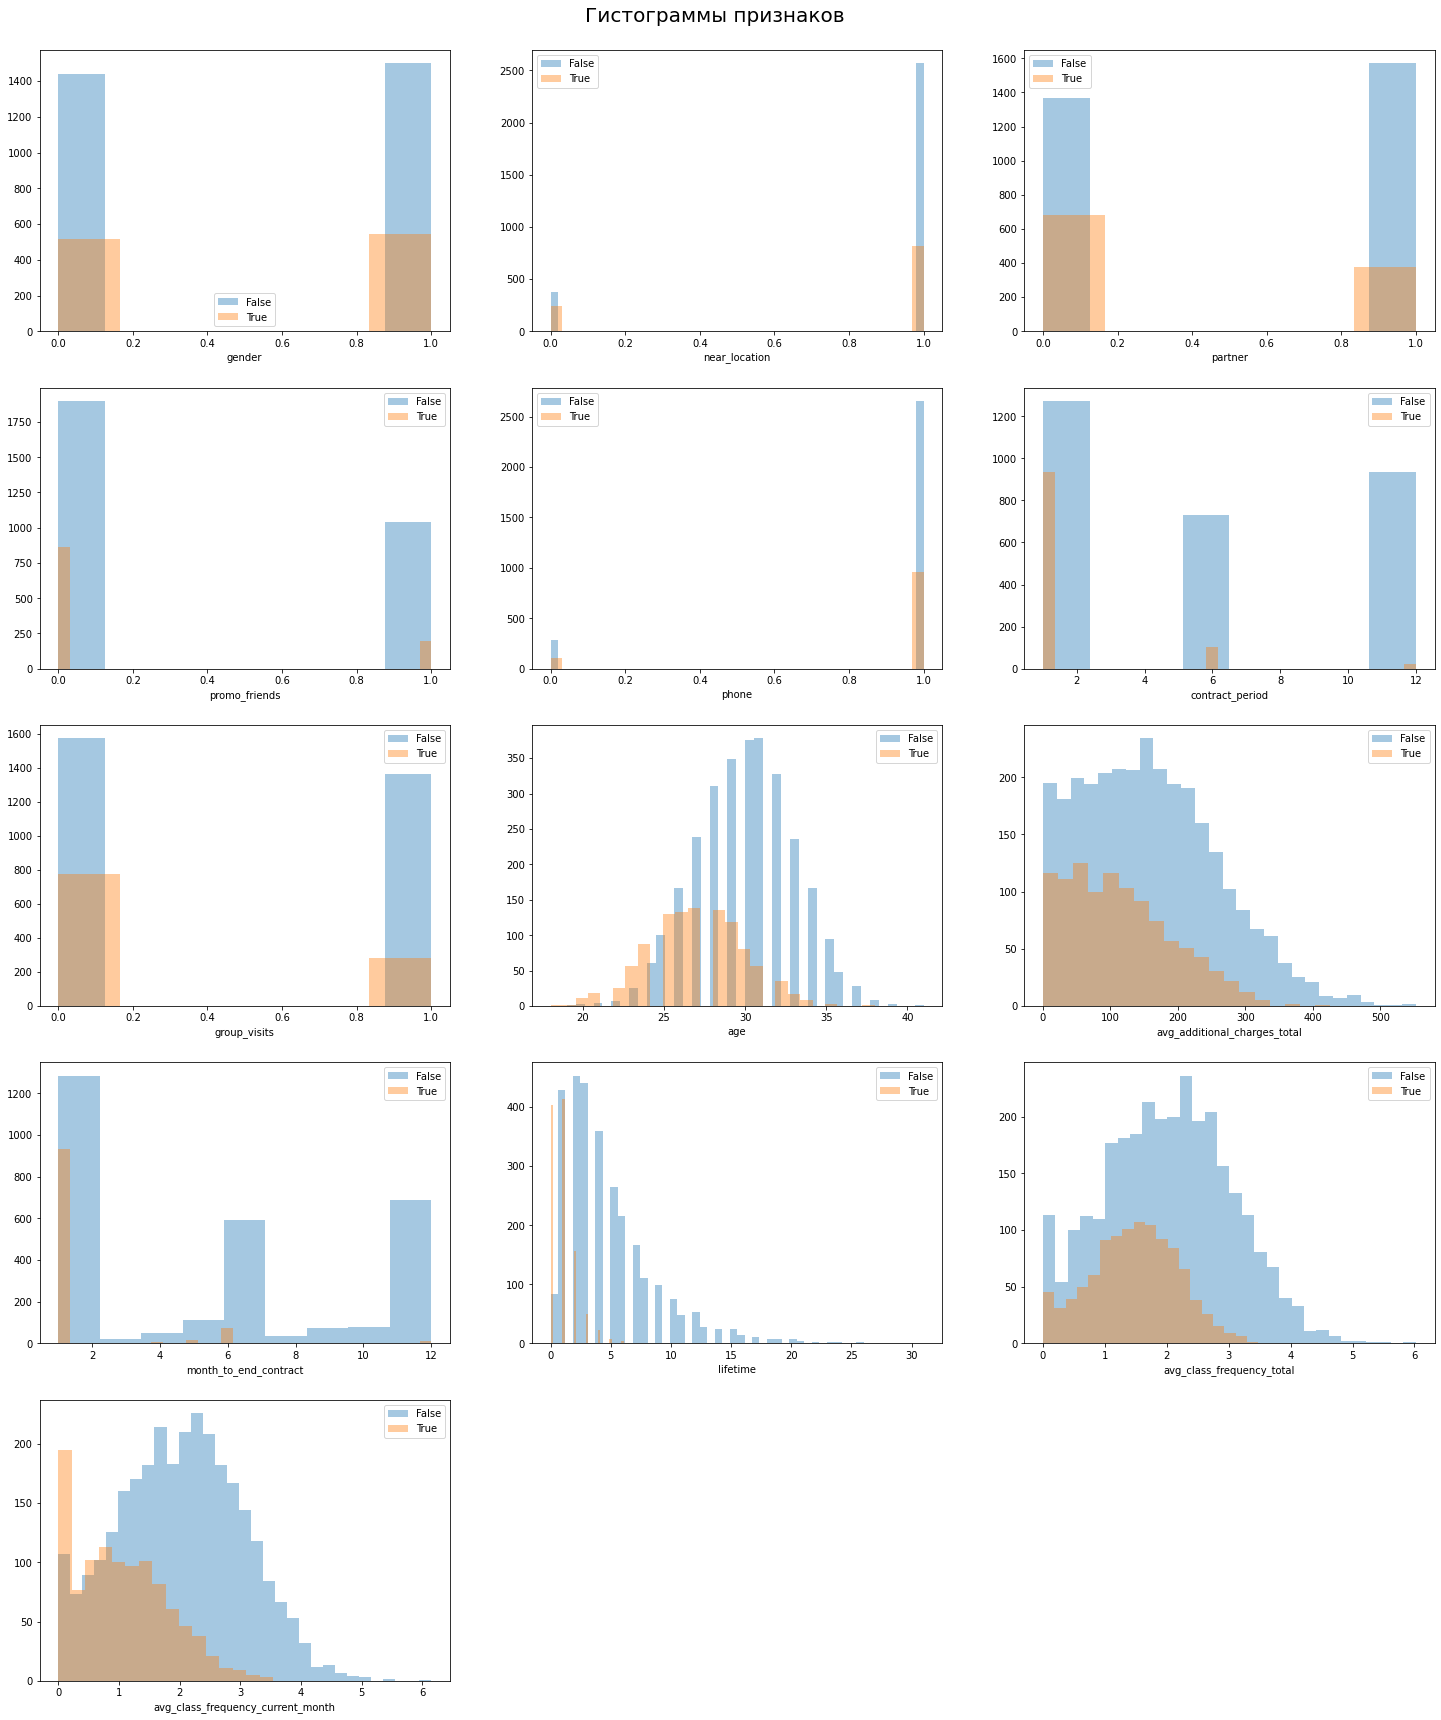

In [16]:
# функция отрисовки распределения признаков
def create_hist( data, column):
    unique_values = data[column].unique()
    # установим заголовок для графика
    fig = plt.figure(figsize=(25, 30))    
    fig.suptitle('Гистограммы признаков', y=0.9, fontsize=20) 

    for i, el in enumerate(data.columns.drop(column)):
        ax = fig.add_subplot(5,3,i + 1)
        for val in unique_values:    
            sns.distplot(
            data[data[column] == val][el],
            label=val,    
            kde=False,
            ax=ax
            )
        plt.legend()
    plt.show()
create_hist(data,'churn')    

Наблюдаем:
* по полю gender деление равномерное среди ушедших и оставшихся
* по полю near_location - большишиство клиентов живут или работают недалеко, а среди клиентов кто живет далеко ушло большинство
* по полю partner деление равномерное, среди тех кто не является корпоративным клиентом ушло больше
* по полю promo_friends тех кто пришел сам больше, нежели тех кто пришел по акции «приведи друга». Также ушедших больше среди тех, кто пришел сам
* по полю phone большинство клиентов оставляют номер телефона и ушедших среди них больше
* по полю contract_period большиство клиентов берут месячные абонементы, на втором месте абонементы на год, затем на полгода. Ушедших больше среди тех кто брал месячные абонементы
* по полю group_visits большиство ушедших клиентов не ходили на групповые занятия
* по полю age распределение похоже на нормальное, большинство ушедших клиентов в возврате от 25-28
* по полю avg_additional_charges_total ушедшие клиенты значительно меньше тратили денег на другие услуги фитнес-центра
* по полю month_to_end_contract можно сделать вывод, что большиство клиентов уходят, когда срок до окончания текущего действующего абонемента меньше месяца
* по полю lifetime делаем вывод, что ушедшие клиенты в основном новенькие
* по полю avg_class_frequency_total ушедшие клиенты редко ходят в зал
* по полю avg_class_frequency_current_month большиство ушедших клиентов последнюю неделю не посещали фитнес-центр.

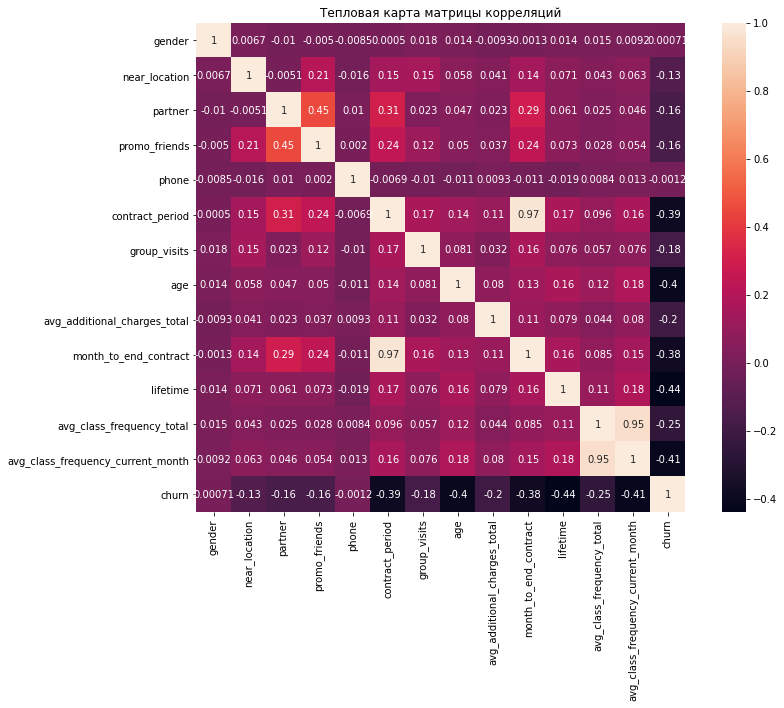

In [17]:
#построим и отрисуем матрицу корреляций
cm = data.corr()  #вычисляем матрицу корреляций
# fig, ax = plt.subplots()
# размер тепловой карты
plt.figure(figsize=(13, 9))
# установим заголовок для графика
plt.title("Тепловая карта матрицы корреляций")
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot = True, square=True)
plt.show()

Наблюдается сильная корреляция между признаками month_to_end_contract(срок до окончания текущего абонемента) и contract_period(длительность текущего абонемента), очевидно в данных много новых клиентов, кто недавно приобрел абонементы, длительность действия абонементов совпадает со сроком окончания абонемента.

Также наблюдается коррекляция между avg_class_frequency_total(средняя частота посещений в неделю за все время с начала действия абонемента) и avg_class_frequency_current_month(средняя частота посещений в неделю за предыдущий месяц), это говорит нам о том, что клиенты посещают фитнес-центр с одинаковой частотой.

### Вывод



В ходе проведенного анализа данных получили следующие выводы:
* средний возраст ушедших клиентов 26 лет
* большишиство клиентов живут или работают недалеко, а среди клиентов кто живет далеко уходит большинство
* ушедшие клиенты брали короткие абонементы на 1 или 3 месяца
* ушедшие клиенты очень редко посещали фитнес-клуб, редко посещали групповые занятия
* как правило клиенты были новенькие, время с момента первого обращения в фитнес-центр около месяца
* ушедшие клиенты значительно меньше тратили денег на другие услуги фитнес-центра
* клиенты в основном прекращают пользоваться услугами фитнес-центра в последний месяц действия абонемента, при этом в последнюю неделю практически не посещают зал.

# Шаг 4. Построение моделей прогнозирования оттока клиентов <a id="step4"></a>

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце. Обучим модель на train-выборке двумя способами:
* логистической регрессией,
* случайным лесом.

Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели.

In [18]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))
    
# разделение данных на признаки (матрица X) и целевую переменную (y)
X = data.drop('churn', axis = 1)
y = data['churn']

# разделение модели на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# обучение StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# преобразование обучающей и валидационного набора данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# алгоритм для модели логистической регрессии
lr_model = LogisticRegression(solver='liblinear', random_state=0)

# обучение модели
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

# выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title = 'Метрики для модели логистической регрессии:'
)

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	ROC_AUC: 0.97


Для метода "случайный лес" попробуем найти наиболее оптимальные значения параметров с помощью класса RandomizedSearchCV:

In [25]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса с параметрами по-умолчанию
rf_model = RandomForestClassifier()

# число «деревьев» в «случайном лесу»
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# число признаков для выбора расщепления
max_features = ['log2', 'sqrt']
# максимальная глубина деревьев
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
# минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
# минимальное число объектов в листьях
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
# использование для построения деревьев подвыборки с возвращением
bootstrap = [True, False]
# создание массива со всеми значениями параметров
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# поиск наилучших параметров
rs_model = RandomizedSearchCV(rf_model,
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=3, 
                        random_state=0)
# обучение модели
rs_model.fit(X_train_st, y_train)
# вывод наилучших параметров
print('Наилучшие параметры для метода "случайный лес\n":', rs_model.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  5.8min
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:  8.6min finished


Наилучшие параметры для метода "случайный лес
": {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 11, 'bootstrap': True}


In [26]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса с наилучшими параметрами
rf_model = RandomForestClassifier(n_estimators = 700,
                                      min_samples_split = 2, 
                                      max_features = 'log2', 
                                      min_samples_leaf = 2, 
                                      max_depth = 11,
                                      bootstrap = True)
# обучение моделью случайного леса
rf_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
 
# выведем все метрики
print_all_metrics(
        y_test,
        rf_predictions,
        rf_probabilities,
        title = 'Метрики для модели случайного леса:'
    )

Метрики для модели случайного леса:
	Accuracy: 0.91
	Precision: 0.84
	Recall: 0.79
	ROC_AUC: 0.97


Обе модели логистическая регрессия и случайный лес показали хорошие и близкие результаты. Но логистическая регрессия чуть лучше, доля правильных ответов (accuracy), точность (precision) и полнота (recall) у нее выше.

### Вывод

В ходе Шага 4. Построение моделей прогнозирования оттока клиентов получили, что модель, обученная с помощью логистической регрессии, показала результаты лучше.

# Шаг 5. Кластеризация клиентов <a id="step5"></a>

Отложим в сторону столбец с оттоком и проведем кластеризацию клиентов, для этого:
* Стандартизируем данные
* Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.
* Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. 
* Посмотрим на средние значения признаков для кластеров
* Построим распределения признаков для кластеров
* Для каждого полученного кластера посчитаем долю оттока.

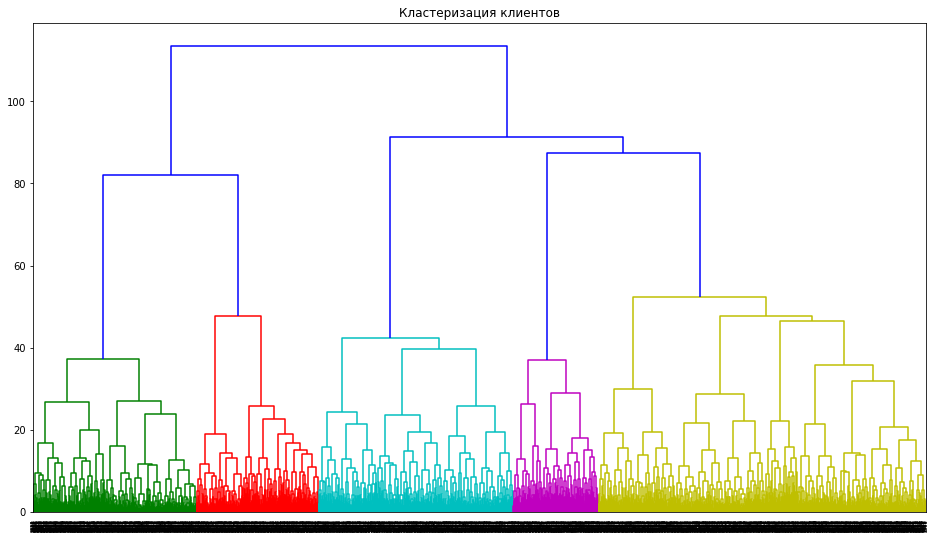

In [27]:
# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(data)

# отрисовка дендрограммы
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация клиентов')
plt.show()

Оптимальное число кластеров 5.

In [28]:
# задаём модель k_means с числом кластеров 5
model = KMeans(n_clusters=5)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = model.fit_predict(X_sc)

# сохраняем метки кластера в поле нашего датасета
data['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
data.drop('churn', axis=1).groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
cluster_km,,,,,,,,,,,,,
0,0.503650,0.938478,0.767466,0.563087,1.000000,11.199166,0.558916,29.880083,162.792877,10.254432,4.683003,2.031250,2.025391
1,0.477193,0.824561,0.459649,0.264327,1.000000,2.761404,0.385965,30.028070,151.348083,2.552047,4.688889,1.157227,1.155273
2,0.526178,0.869110,0.471204,0.308901,0.000000,4.816754,0.429319,29.340314,144.517761,4.502618,3.955497,1.857422,1.727539
3,0.546929,0.844728,0.367323,0.209733,0.998841,2.676709,0.436848,29.988413,160.879822,2.469293,4.600232,2.904297,2.912109
4,0.506908,0.759830,0.341126,0.179596,0.996812,1.566419,0.257173,26.907545,114.993469,1.513284,0.975558,1.448242,1.025391


В 0 кластере клиенты жтвут или работают рядом с фитнес-центром, покупают абонементы на год, посещают зал уже 5 месяцев, чаще других кластеров посещают групповые занятия, больше всех тратят на дополнительные услуги, приходят по партнерской или "дружеской" программе.

В 1 кластере клиенты покупают короткие абонементы, более взрослые клиенты, посещают зал уже 5 месяцев, пользуются допольнительными услугами, посещают зал редко.

Во 2 кластере находятся те, кто живет или работает рядом с фитнес-центром, также покупают короткие абонементы, чаще других посещают групповые занятия (но не чаще 0 кластера), пользуются дополнительными услугами, посещают центр уже 4 месяца, чаще всех ходят в зал.

В 3 кластере также находятся те, кто живет или работает рядом с фитнес-центром, не оставляют свой номер телефона, половина клиентов приходят по партнерской или "дружеской" программе, половина стабильно посещают групповые занятия, приобретают абонементы средней длительности, посещают центр меньше 4 месяцев.

В 4 кластере находятся те, кто живет или работает далеко, из них меньшинство ходит на групповые программы, покупают короткие абонементы, меньше всех тратят на дополнительные услуги, посещают фитнес-центр меньше месяца. 

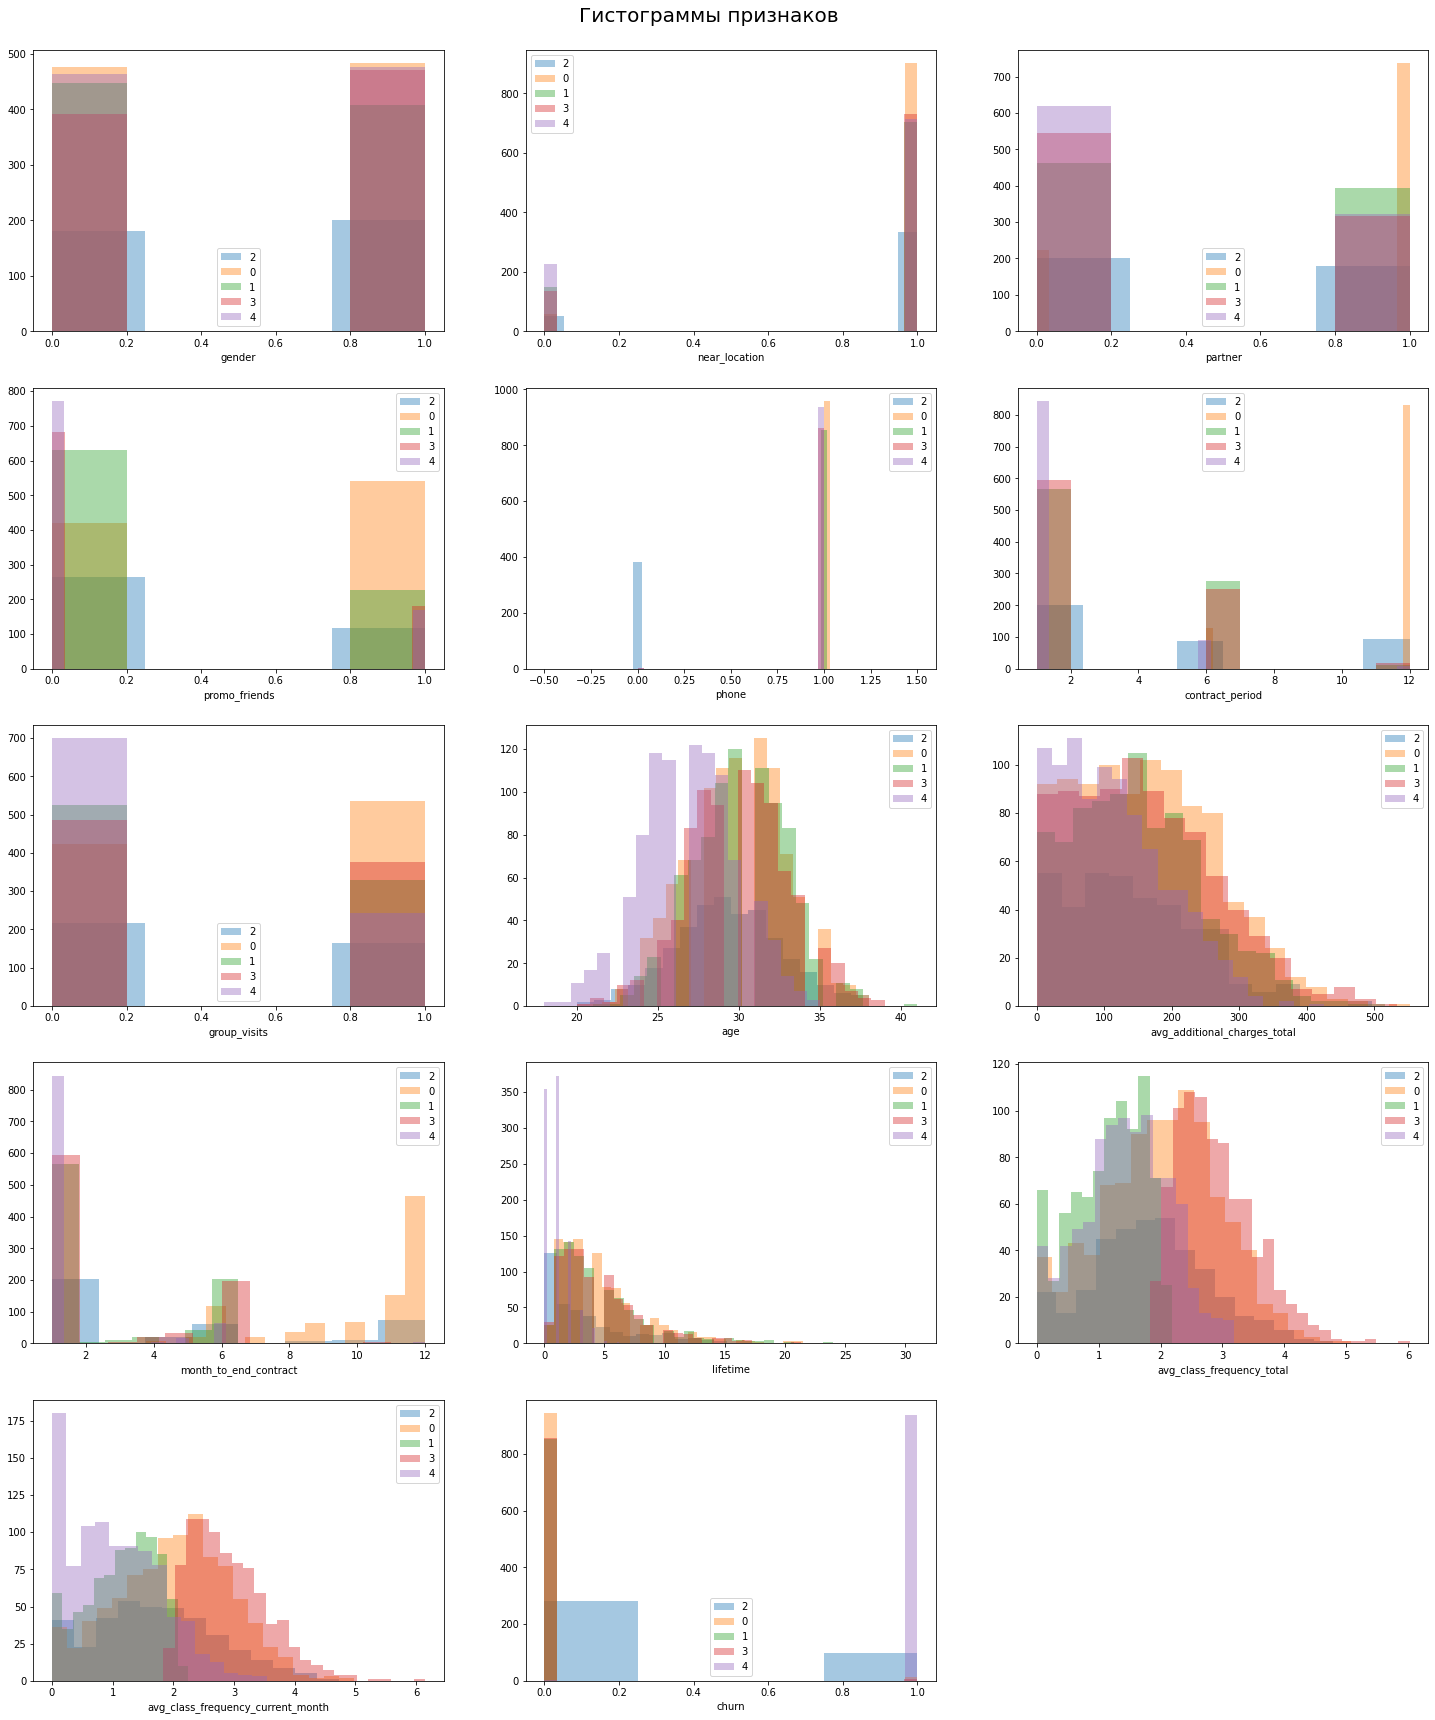

In [29]:
# построим гистограммы параметров по кластерам
create_hist(data,'cluster_km')    

Клиенты кластеров 0 и 2 выделяются среди всех остальных: клиенты старше, чаще и дольше ходят в зал, чаще посещают групповые программы, больше тратят денег на дополнительные услуги.

In [30]:
# подсчет доли оттока для каждого кластера
data.groupby('cluster_km')['churn'].mean().reset_index()

,cluster_km,churn
0,0,0.015641
1,1,0.001170
2,2,0.261780
3,3,0.006952
4,4,0.997875


Кластер 4 состоит из клиентов, склонных к оттоку. А в кластерах 0,1 и 2 почти 100% оставшихся клиентов. В кластере 3 доля ушедших 26%.

### Вывод

В ходе проведенной кластеризации клиентов фитнес-центра можно сделать вывод, что самые надежные клиенты те, кто ходят часто в зал и на групповые занятия в течении не менее 4х месяцев, активно пользуются дополнительными услугами центра, живут или работают рядом с фитнес центром, средний возврат таких клиентов 30 лет.

# Шаг 6. Выводы и базовые рекомендации по работе с клиентами <a id="step6"></a>

Ушедших клиентов характеризуют следующие признаки:
* как правило, возраст клиентов не превышает 26 лет
* клиенты очень редко посещают фитнес-клуб
* клиенты берут короткие абонементы на 1 или 3 месяца
* как правило клиенты новенькие.

Обе модели логистическая регрессия и случайный лес показали хорошие и близкие результаты. Но логистическая регрессия чуть лучше.

По имеющимся данным выделили 5 кластеров: где кластер 4 состоит из клиентов, склонных к оттоку (99%). А в 0, 1 и 2 кластере почти 100% оставшихся клиентов.

0 и 2 кластер отличаются более высокими показателями: клиенты старше, чаще и дольше ходят в зал, чаще посещают групповые программы, больше тратят денег на дополнительные услуги. 

Клиенты 4 кластера оформляют короткие абонементы, ходят в среднем 1 раз в неделю, очень редко посещают групповые занятия, далеко живут или работают. 

Рекомендации:
* Для клиентов попадающих под условия 4 кластера, возможно, стоит рассмотреть индивидуальные предложения по дополнительным услугам, групповым тренировкам, чтобы была мотивация ходить именно в наш фитнес-центр. 
* Проанализировать причины тех, кто редко ходит в зал, возможно это с чем-то связано, может не хватает занятий для новичков или какого-то оборудования.
* Поддерживать тех клиентов, кто попадает под условия 0, 2 кластера для дальнейшего плотного сотрудничества, предлагать ещё больше дополнительных услуг.